In [1]:
import pandas as pd
df23=pd.read_csv('040700024xt.csv')
df23

,Age,Sex,Site,Radiation,Chemotherapy,bone,brain,liver,lung,＜24
0,80+,Male,"C34.3-Lower lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes
1,80+,Male,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes
2,60-69,Male,"C34.3-Lower lobe, lung",None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,Yes
3,80+,Female,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,Yes,Yes,Yes,Yes
4,60-69,Male,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
2979,60-69,Male,"C34.9-Lung, NOS",Yes,Yes,None/Unknown,None/Unknown,None/Unknown,None/Unknown,No
2980,60-69,Male,"C34.3-Lower lobe, lung",Yes,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes
2981,60-69,Male,"C34.3-Lower lobe, lung",Yes,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes
2982,60-69,Male,"C34.3-Lower lobe, lung",Yes,Yes,Yes,Yes,None/Unknown,None/Unknown,Yes


In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df23['Age'] = label_encoder.fit_transform(df23['Age'])
df23

,Age,Sex,Site,Radiation,Chemotherapy,bone,brain,liver,lung,＜24
0,4,Male,"C34.3-Lower lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes
1,4,Male,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes
2,2,Male,"C34.3-Lower lobe, lung",None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,Yes
3,4,Female,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,Yes,Yes,Yes,Yes
4,2,Male,"C34.1-Upper lobe, lung",None/Unknown,Yes,Yes,None/Unknown,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
2979,2,Male,"C34.9-Lung, NOS",Yes,Yes,None/Unknown,None/Unknown,None/Unknown,None/Unknown,No
2980,2,Male,"C34.3-Lower lobe, lung",Yes,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes
2981,2,Male,"C34.3-Lower lobe, lung",Yes,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes
2982,2,Male,"C34.3-Lower lobe, lung",Yes,Yes,Yes,Yes,None/Unknown,None/Unknown,Yes


In [3]:
df23['Sex']=df23['Sex'].map({'Male':1,'Female':0})
df23['Sex'].head()

0    1
1    1
2    1
3    0
4    1
Name: Sex, dtype: int64

In [4]:
import pandas as pd
dataSite = df23['Site']
dfSite = pd.DataFrame(dataSite)
dfSite_encoded = pd.get_dummies(dfSite, columns=['Site'], prefix=['Site'])
dfSite_encoded = pd.get_dummies(dfSite, columns=['Site'], prefix=['Site']).astype(int)
dfSite_encoded

df23=pd.concat([df23,dfSite_encoded],axis=1)
df23=df23.drop('Site',axis=1)
df23.head()

,Age,Sex,Radiation,Chemotherapy,bone,brain,liver,lung,＜24,Site_C34.0-Main bronchus,"Site_C34.1-Upper lobe, lung","Site_C34.2-Middle lobe, lung","Site_C34.3-Lower lobe, lung",Site_C34.8-Overlapping lesion of lung,"Site_C34.9-Lung, NOS"
0,4,1,None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes,0,0,0,1,0,0
1,4,1,None/Unknown,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes,0,1,0,0,0,0
2,2,1,None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,Yes,0,0,0,1,0,0
3,4,0,None/Unknown,Yes,Yes,Yes,Yes,Yes,Yes,0,1,0,0,0,0
4,2,1,None/Unknown,Yes,Yes,None/Unknown,Yes,Yes,Yes,0,1,0,0,0,0


In [5]:
df23['Radiation']=df23['Radiation'].map({'Yes':1,'None/Unknown':0})
df23['Radiation'].head()
df23

,Age,Sex,Radiation,Chemotherapy,bone,brain,liver,lung,＜24,Site_C34.0-Main bronchus,"Site_C34.1-Upper lobe, lung","Site_C34.2-Middle lobe, lung","Site_C34.3-Lower lobe, lung",Site_C34.8-Overlapping lesion of lung,"Site_C34.9-Lung, NOS"
0,4,1,0,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes,0,0,0,1,0,0
1,4,1,0,Yes,Yes,None/Unknown,Yes,None/Unknown,Yes,0,1,0,0,0,0
2,2,1,0,None/Unknown,None/Unknown,None/Unknown,None/Unknown,None/Unknown,Yes,0,0,0,1,0,0
3,4,0,0,Yes,Yes,Yes,Yes,Yes,Yes,0,1,0,0,0,0
4,2,1,0,Yes,Yes,None/Unknown,Yes,Yes,Yes,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,2,1,1,Yes,None/Unknown,None/Unknown,None/Unknown,None/Unknown,No,0,0,0,0,0,1
2980,2,1,1,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes,0,0,0,1,0,0
2981,2,1,1,Yes,None/Unknown,Yes,None/Unknown,None/Unknown,Yes,0,0,0,1,0,0
2982,2,1,1,Yes,Yes,Yes,None/Unknown,None/Unknown,Yes,0,0,0,1,0,0


In [6]:
df23['Chemotherapy']=df23['Chemotherapy'].map({'Yes':1,'None/Unknown':0})
df23['Chemotherapy'].head()

0    1
1    1
2    0
3    1
4    1
Name: Chemotherapy, dtype: int64

In [7]:
df23['bone']=df23['bone'].map({'Yes':1,'None/Unknown':0})
df23['bone'].head()

0    1
1    1
2    0
3    1
4    1
Name: bone, dtype: int64

In [8]:
df23['brain']=df23['brain'].map({'Yes':1,'None/Unknown':0})
df23['brain'].head()

0    0
1    0
2    0
3    1
4    0
Name: brain, dtype: int64

In [9]:
df23['liver']=df23['liver'].map({'Yes':1,'None/Unknown':0})
df23['liver'].head()

0    1
1    1
2    0
3    1
4    1
Name: liver, dtype: int64

In [10]:
df23['lung']=df23['lung'].map({'Yes':1,'None/Unknown':0})
df23['lung'].head()

0    0
1    0
2    0
3    1
4    1
Name: lung, dtype: int64

In [11]:
df23['＜24']=df23['＜24'].map({'Yes':1,'No':0})
df23['＜24'].head()
df23.head()

,Age,Sex,Radiation,Chemotherapy,bone,brain,liver,lung,＜24,Site_C34.0-Main bronchus,"Site_C34.1-Upper lobe, lung","Site_C34.2-Middle lobe, lung","Site_C34.3-Lower lobe, lung",Site_C34.8-Overlapping lesion of lung,"Site_C34.9-Lung, NOS"
0,4,1,0,1,1,0,1,0,1,0,0,0,1,0,0
1,4,1,0,1,1,0,1,0,1,0,1,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,4,0,0,1,1,1,1,1,1,0,1,0,0,0,0
4,2,1,0,1,1,0,1,1,1,0,1,0,0,0,0


In [12]:
df23.to_excel('output040700024xt.xlsx', index=False)  # 如果不需要保存索引，则设置 index=False

In [1]:
import pandas as pd
# 加载数据
X = pd.DataFrame(pd.read_excel('dxoutput040700024x.xlsx')).values  # 输入特征
y = pd.DataFrame(pd.read_excel('dyoutput040700024x.xlsx')).values  # 目标变量

In [2]:
dataX = pd.read_excel("dxoutput040700024x.xlsx",
                      names=["Age","Sex","Radiation","Chemotherapy","Bone","Brain","Liver","Lung","Main bronchus",
                             "Upper lobe, lung","Middle lobe, lung",
                             "Lower lobe, lung","Overlapping lesion of lung","Lung, NOS"])

In [3]:
print(len(dataX))

2950


In [4]:
datay = pd.read_excel("dyoutput040700024x.xlsx",
                      names=["＜24"])

In [5]:
print(len(datay))

2950


In [6]:
X0 = dataX[["Age","Sex","Radiation","Chemotherapy","Bone","Brain","Liver","Lung","Main bronchus",
                             "Upper lobe, lung","Middle lobe, lung",
                             "Lower lobe, lung","Overlapping lesion of lung","Lung, NOS"]]

In [7]:
y0 =datay['＜24']

In [9]:
from sklearn.metrics import confusion_matrix
y_pred =model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[  0  44]
 [  0 841]]


In [11]:
import pandas as pd
Xtest = pd.DataFrame(pd.read_excel('dxoutput040700024t.xlsx')).values  
ytest = pd.DataFrame(pd.read_excel('dyoutput040700024t.xlsx')).values  

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


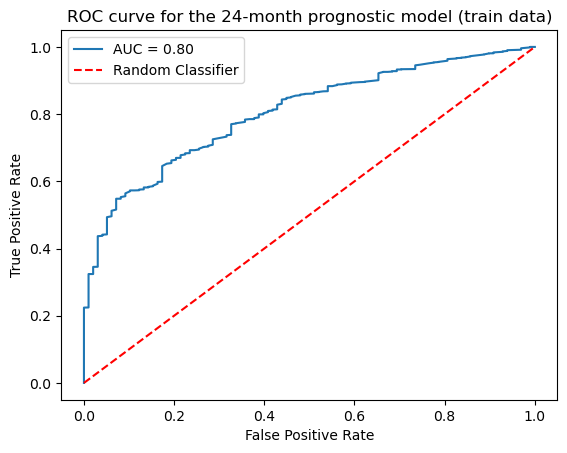

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'newton-cg', 'liblinear'],
    'max_iter': [200, 500]
}

base_model = LogisticRegression()

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

clf = LogisticRegression(**best_params)

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
auc_score = roc_auc_score(y_train, y_score)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the 24-month prognostic model (train data)')
plt.legend()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


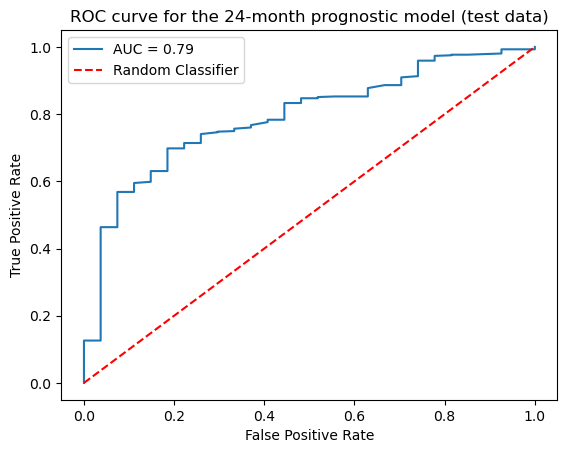

In [16]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
clf = LogisticRegression()  
clf.fit(X_train, y_train)  
y_score = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')   
plt.title('ROC curve for the 24-month prognostic model (test data)')             
plt.legend()                   
plt.show()  

In [20]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from sklearn.model_selection import GridSearchCV

shap.initjs()

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [60, 70, 80, 90, 100],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'min_child_weight': [6, 8, 10]
}

base_model = xgb.XGBRegressor(
    gamma=0,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=14
)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X0, y0)

best_params = grid_search.best_params_

model = xgb.XGBRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    gamma=0,
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=14
)

model.fit(X0, y0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

✅ 图像已保存至：D:\pythoncf\图4-24.tif


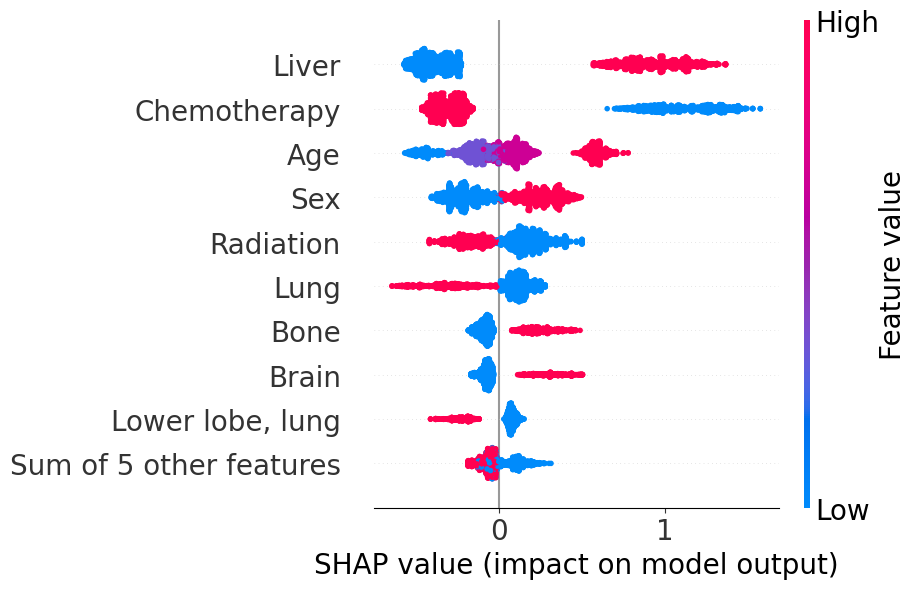

In [25]:
import shap
import matplotlib.pyplot as plt
import os 

shap.plots.beeswarm(shap_values, show=False)

fig = plt.gcf()
ax = plt.gca()

fig.set_size_inches(9, 6)

ax.set_xlabel("SHAP value (impact on model output)", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

cb = fig.axes[-1]
cb.tick_params(labelsize=20)
cb.set_ylabel("Feature value", fontsize=20)

plt.tight_layout()
plt.savefig(
    "图4-24.tif", 
    dpi=600, 
    bbox_inches="tight",
    pil_kwargs={'compression': 'tiff_lzw'} 
)

save_path = os.path.abspath("图4-24.tif")
print(f"✅ 图像已保存至：{save_path}")

plt.show()


In [38]:
24

24